In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy import defuzzify

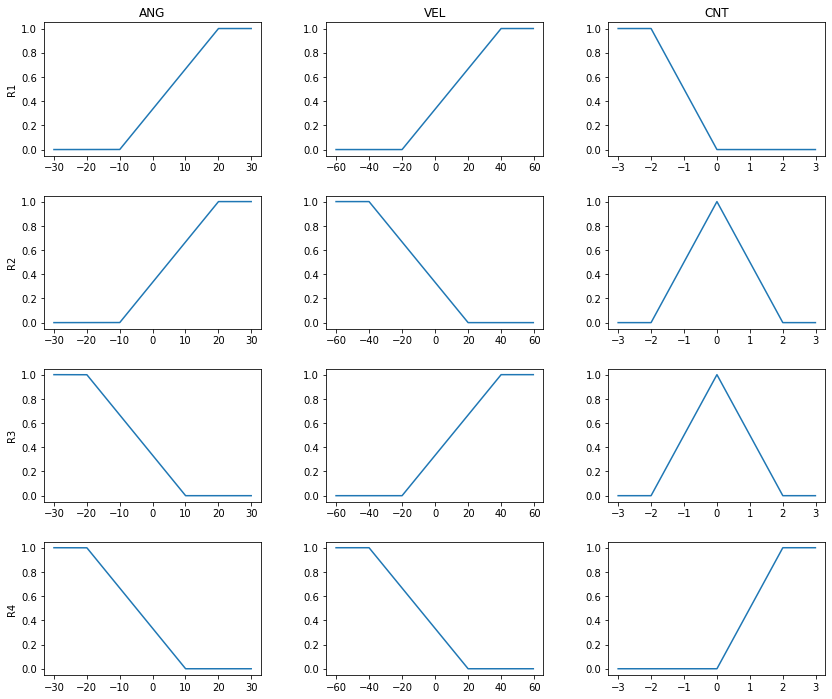

In [ ]:
ang_universe = np.arange(-30,30,0.5)
vel_universe = np.arange(-60,60,1.0)
cnt_universe = np.arange(-3.0, 3.0, 0.05)

ang_pl = fuzz.trapmf(ang_universe, [-10, 20, 30, 30])
ang_nl = fuzz.trapmf(ang_universe, [-30, -30, -20, 10])

vel_pl = fuzz.trapmf(vel_universe, [-20, 40, 60, 60])
vel_nl = fuzz.trapmf(vel_universe, [-60, -60, -40, 20])

cur_pl = fuzz.trapmf(cnt_universe, [0, 2, 3, 3])
cur_nc = fuzz.trimf(cnt_universe, [-2, 0, 2])
cur_nl = fuzz.trapmf(cnt_universe, [-3, -3, -2, 0])

fig, axes = plt.subplots(4, 3, figsize=(14,12))

axes[0,0].set_title("ANG")
axes[0,1].set_title("VEL")
axes[0,2].set_title("CNT")

axes[0,0].set_ylabel("R1")
axes[1,0].set_ylabel("R2")
axes[2,0].set_ylabel("R3")
axes[3,0].set_ylabel("R4")

axes[0,0].plot(ang_universe, ang_pl)
axes[0,1].plot(vel_universe, vel_pl)
axes[0,2].plot(cnt_universe, cur_nl)

axes[1,0].plot(ang_universe, ang_pl)
axes[1,1].plot(vel_universe, vel_nl)
axes[1,2].plot(cnt_universe, cur_nc)

axes[2,0].plot(ang_universe, ang_nl)
axes[2,1].plot(vel_universe, vel_pl)
axes[2,2].plot(cnt_universe, cur_nc)

axes[3,0].plot(ang_universe, ang_nl)
axes[3,1].plot(vel_universe, vel_nl)
axes[3,2].plot(cnt_universe, cur_pl)

plt.subplots_adjust(hspace = 0.3,wspace = 0.3)


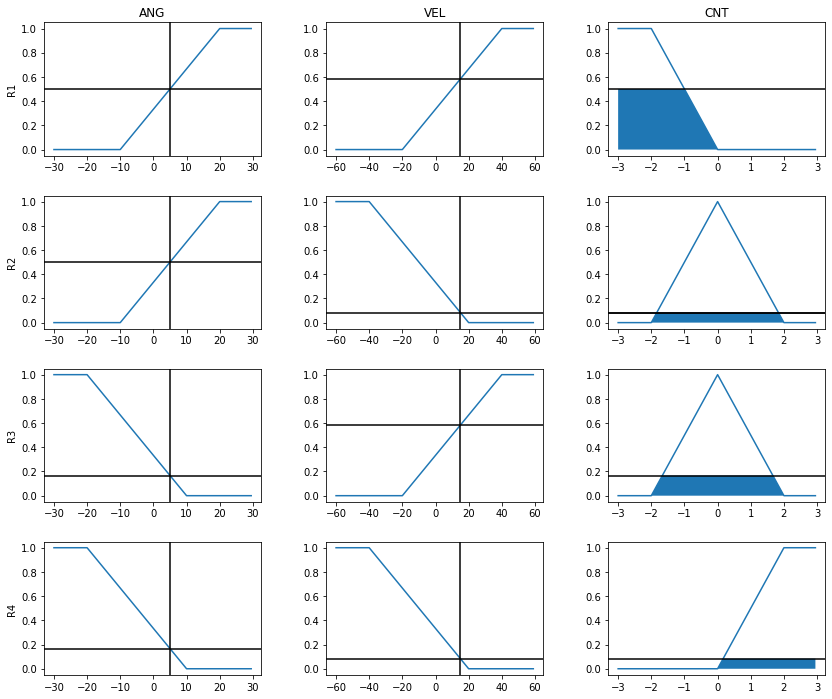

In [ ]:
import copy
ang_universe = np.arange(-30,30,0.5)
vel_universe = np.arange(-60,60,1.0)
cnt_universe = np.arange(-3.0, 3.0, 0.05)
y_plots = []

ang_pl = fuzz.trapmf(ang_universe, [-10, 20, 30, 30])
ang_nl = fuzz.trapmf(ang_universe, [-30, -30, -20, 10])

vel_pl = fuzz.trapmf(vel_universe, [-20, 40, 60, 60])
vel_nl = fuzz.trapmf(vel_universe, [-60, -60, -40, 20])

cur_pl = fuzz.trapmf(cnt_universe, [0, 2, 3, 3])
cur_nc = fuzz.trimf(cnt_universe, [-2, 0, 2])
cur_nl = fuzz.trapmf(cnt_universe, [-3, -3, -2, 0])

fig, axes = plt.subplots(4, 3, figsize=(14,12))

axes[0,0].set_title("ANG")
axes[0,1].set_title("VEL")
axes[0,2].set_title("CNT")

axes[0,0].set_ylabel("R1")
axes[1,0].set_ylabel("R2")
axes[2,0].set_ylabel("R3")
axes[3,0].set_ylabel("R4")

axes[0,0].plot(ang_universe, ang_pl)
axes[0,0].axvline(5, color="black")
axes[0,1].plot(vel_universe, vel_pl)
axes[0,1].axvline(15, color="black")
axes[0,2].plot(cnt_universe, cur_nl)

min_1 = fuzz.interp_membership(ang_universe, ang_pl, 5)
min_2 = fuzz.interp_membership(vel_universe, vel_pl, 15)
y = min(min_1, min_2)
y_plot = [y for i in cnt_universe]

for i in range(len(y_plot)):
  y_plot[i] = min(y_plot[i], cur_nl[i])

y_plots.append(copy.copy(y_plot))
axes[0,2].fill_between(cnt_universe, y_plot, interpolate=True)

axes[0,0].axhline(min_1, color="black")
axes[0,1].axhline(min_2, color="black")
axes[0,2].axhline(y, color="black")

axes[1,0].plot(ang_universe, ang_pl)
axes[1,0].axvline(5, color="black")
axes[1,1].plot(vel_universe, vel_nl)
axes[1,1].axvline(15, color="black")
axes[1,2].plot(cnt_universe, cur_nc)

min_1 = fuzz.interp_membership(ang_universe, ang_pl, 5)
min_2 = fuzz.interp_membership(vel_universe, vel_nl, 15)
y = min(min_1, min_2)
y_plot = [y for i in cnt_universe]

for i in range(len(y_plot)):
  y_plot[i] = min(y_plot[i], cur_nc[i])
y_plots.append(copy.copy(y_plot))
axes[1,2].fill_between(cnt_universe, y_plot, interpolate=True)

axes[1,0].axhline(min_1, color="black")
axes[1,1].axhline(min_2, color="black")
axes[1,2].axhline(y, color="black")
axes[1,2].axhline(y, color="black")

axes[2,0].plot(ang_universe, ang_nl)
axes[2,0].axvline(5, color="black")
axes[2,1].plot(vel_universe, vel_pl)
axes[2,1].axvline(15, color="black")
axes[2,2].plot(cnt_universe, cur_nc)

min_1 = fuzz.interp_membership(ang_universe, ang_nl, 5)
min_2 = fuzz.interp_membership(vel_universe, vel_pl, 15)
y = min(min_1, min_2)
y_plot = [y for i in cnt_universe]

for i in range(len(y_plot)):
  y_plot[i] = min(y_plot[i], cur_nc[i])
y_plots.append(copy.copy(y_plot))
axes[2,2].fill_between(cnt_universe, y_plot, interpolate=True)
axes[2,0].axhline(min_1, color="black")
axes[2,1].axhline(min_2, color="black")
axes[2,2].axhline(y, color="black")

axes[3,0].plot(ang_universe, ang_nl)
axes[3,0].axvline(5, color="black")
axes[3,1].plot(vel_universe, vel_nl)
axes[3,1].axvline(15, color="black")
axes[3,2].plot(cnt_universe, cur_pl)

min_1 = fuzz.interp_membership(ang_universe, ang_nl, 5)
min_2 = fuzz.interp_membership(vel_universe, vel_nl, 15)
y = min(min_1, min_2)
y_plot = [y for i in cnt_universe]

for i in range(len(y_plot)):
  y_plot[i] = min(y_plot[i], cur_pl[i])
y_plots.append(copy.copy(y_plot))
axes[3,2].fill_between(cnt_universe, y_plot, interpolate=True)
axes[3,0].axhline(min_1, color="black")
axes[3,1].axhline(min_2, color="black")
axes[3,2].axhline(y, color="black")

plt.subplots_adjust(hspace = 0.3,wspace = 0.3)



In [ ]:
final_output = []

for i in range(len(y_plots[0])):
  l1 = y_plots[0][i]
  l2 = y_plots[1][i]
  l3 = y_plots[2][i]
  l4 = y_plots[3][i]

  final_output.append(max(l1,l2,l3,l4))
  

-1.005922968139094


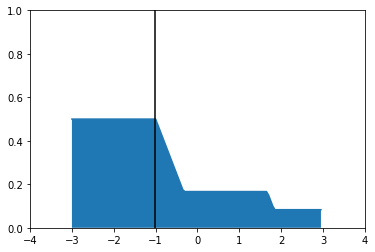

In [ ]:
plt.axis([-4, 4, 0, 1])
plt.plot(cnt_universe, final_output)
plt.fill_between(cnt_universe, final_output)
val = fuzz.centroid(cnt_universe,final_output)
plt.axvline(val, color="black")
print(val)